In [258]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
df_athletes = pd.read_excel("Athletes.xlsx")

In [260]:
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    df_medals = pd.read_excel("Medals.xlsx", engine="openpyxl")

In [261]:
print("Medals dataset size is : {}".format(df_medals.shape))

Medals dataset size is : (93, 7)


In [262]:
df_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [263]:
df_medals["Team/NOC"] = df_medals["Team/NOC"].astype("str")

In [264]:
# Get the 30 best teams by medals and plot them

In [265]:
top_30 = df_medals.sort_values(by=["Total"], ascending=False)[0:30]

<AxesSubplot:xlabel='Team/NOC'>

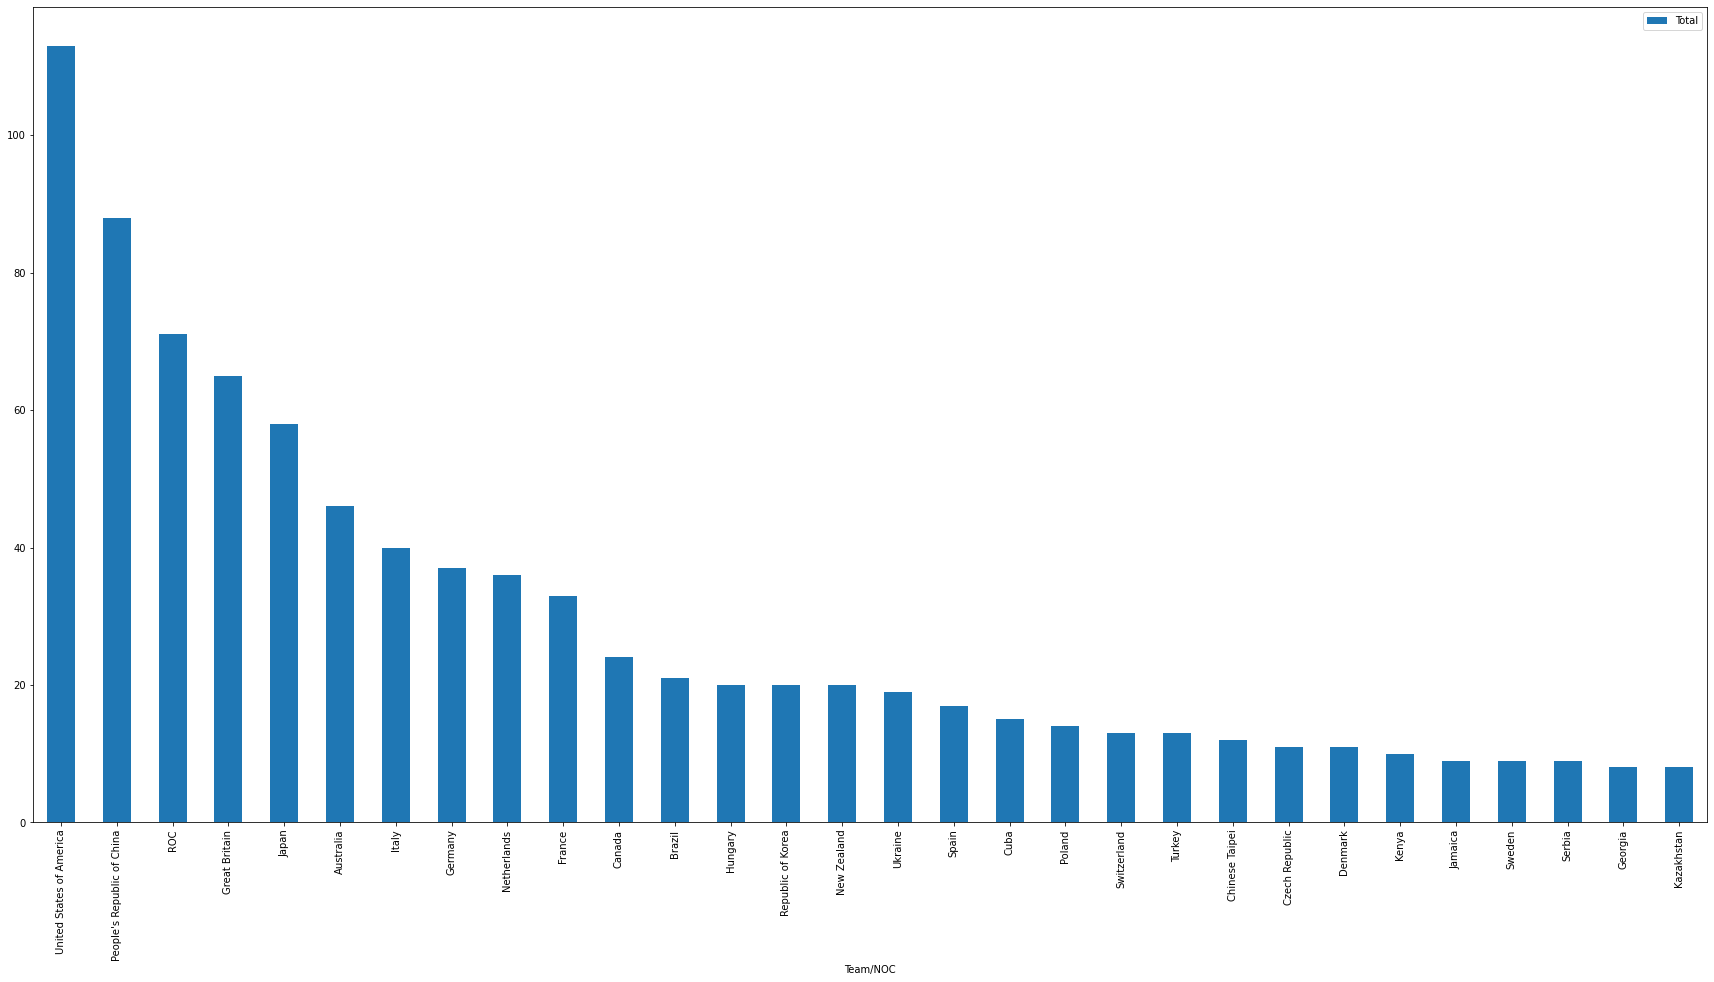

In [266]:
top_30.plot.bar(figsize=(30, 15), y="Total", x="Team/NOC")

In [267]:
top_30.T

,0,1,4,3,2,5,9,8,6,7,...,34,33,17,24,18,20,22,27,32,82
Rank,1,2,5,4,3,6,10,9,7,8,...,35,34,18,25,19,21,23,28,33,83
Team/NOC,United States of America,People's Republic of China,ROC,Great Britain,Japan,Australia,Italy,Germany,Netherlands,France,...,Turkey,Chinese Taipei,Czech Republic,Denmark,Kenya,Jamaica,Sweden,Serbia,Georgia,Kazakhstan
Gold,39,38,20,22,27,17,10,10,10,10,...,2,2,4,3,4,4,3,3,2,0
Silver,41,32,28,21,14,7,10,11,12,12,...,2,4,4,4,4,1,6,1,5,0
Bronze,33,18,23,22,17,22,20,16,14,11,...,9,6,3,4,2,4,0,5,1,8
Total,113,88,71,65,58,46,40,37,36,33,...,13,12,11,11,10,9,9,9,8,8
Rank by Total,1,2,3,4,5,6,7,8,9,10,...,20,22,23,23,25,26,26,26,29,29


In [268]:
top30 = top_30.T.iloc[1:5, :]

In [269]:
top30.set_axis(top30.loc["Team/NOC"], axis="columns", inplace=True)

In [271]:
top30 = top30.iloc[1:, :]

In [280]:
top30 = top30.iloc[:, :2]

array([<AxesSubplot:title={'center':'United States of America'}>,
       <AxesSubplot:title={'center':"People's Republic of China"}>],
      dtype=object)

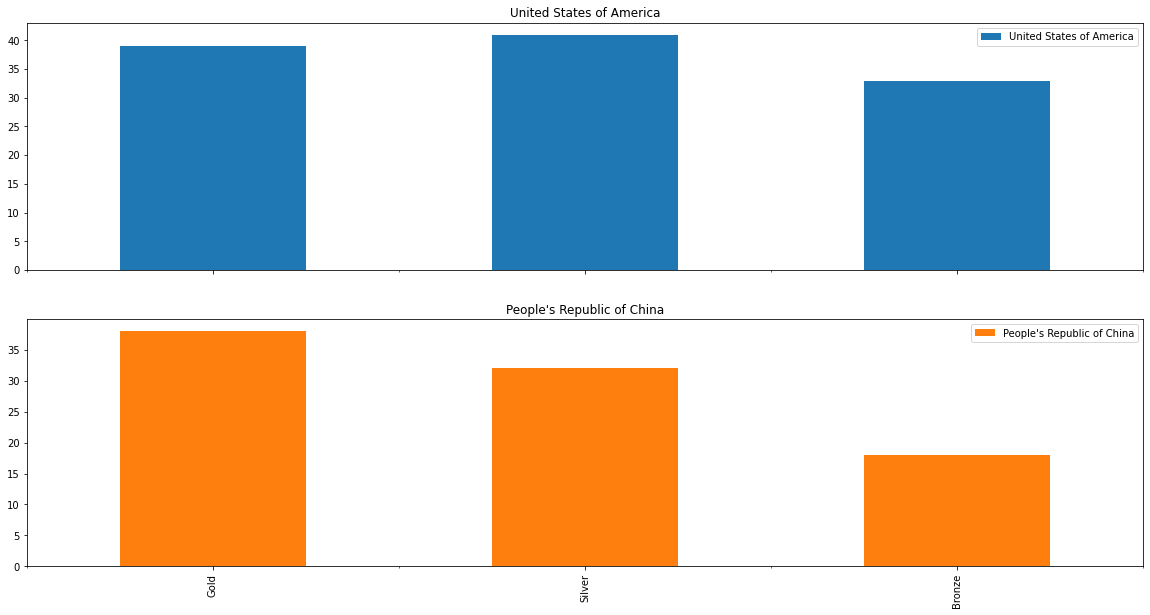

In [282]:
top30.plot.bar(figsize=(20, 10), subplots=True)

In [283]:
# Share of medals per top 10 countries

In [288]:
df_share = df_medals.sort_values(by="Total", ascending=False)

In [289]:
df_share

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
4,5,ROC,20,28,23,71,3
3,4,Great Britain,22,21,22,65,4
2,3,Japan,27,14,17,58,5
...,...,...,...,...,...,...,...
77,77,Saudi Arabia,0,1,0,1,77
76,77,Bahrain,0,1,0,1,77
62,63,Bermuda,1,0,0,1,77
63,63,Morocco,1,0,0,1,77


In [295]:
series_share = df_share.groupby("Team/NOC")["Total"].sum().sort_values(ascending=False)[:11]

<AxesSubplot:>

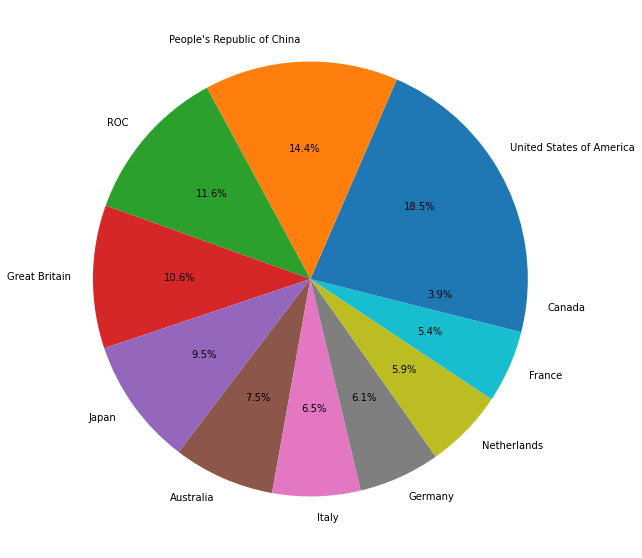

In [307]:
series_share.plot.pie(autopct='%1.1f%%', figsize=(10, 10), ylabel="")

<AxesSubplot:xlabel='NOC'>

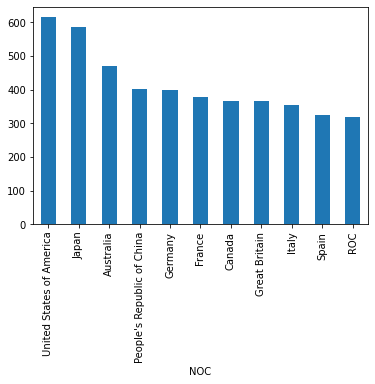

In [316]:
df_athletes.groupby("NOC").count().sort_values(by="Name", ascending=False)[:11]["Discipline"].plot.bar()

<AxesSubplot:>

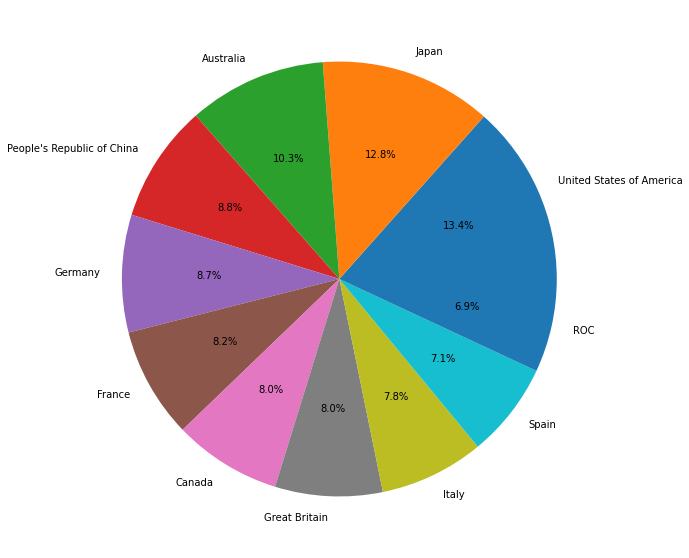

In [327]:
df_athletes.groupby("NOC").count()["Discipline"].sort_values(ascending=False)[:11]\
.plot.pie(figsize=(10, 10), ylabel="", autopct="%1.1f%%")

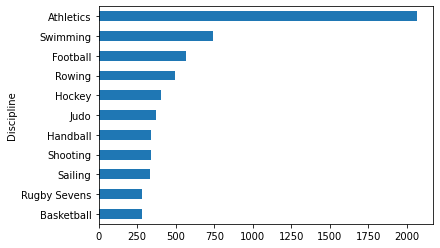

In [332]:
df_athletes.groupby("Discipline").count()["Name"].sort_values(ascending=False)[:11].plot.barh().invert_yaxis()

In [338]:
df_athletes.groupby(["NOC", "Discipline"]).count()

Name
NOC         Discipline               
Afghanistan Athletics               2
            Shooting                1
            Swimming                1
            Taekwondo               1
Albania     Artistic Gymnastics     1
...                               ...
Zambia      Swimming                2
Zimbabwe    Athletics               1
            Golf                    1
            Rowing                  1
            Swimming                2

[2112 rows x 1 columns]